In [27]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Load the dataset using Pandas
data=pd.read_csv(r"D:\ad\tutorials\Data-analys\works\titanic_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
#fill in the missing null values with its median value
#dftitanic['Age'].fillna(dftitanic['Age'].median(), inplace=True)
#median of a age column
mean_col_age=data['Age'].median() 
data.Age=data['Age'].fillna(mean_col_age)

In [34]:
#fill in the missing null values with its median value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [36]:
# To remove the null values we can use fillna method 
# For example:
data.Cabin = data.Cabin.fillna("unknown")
print(data.isnull().sum())
data.isna().sum()
# after filling all the missin values in the dataset

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S


<Axes: xlabel='Age', ylabel='Survived'>

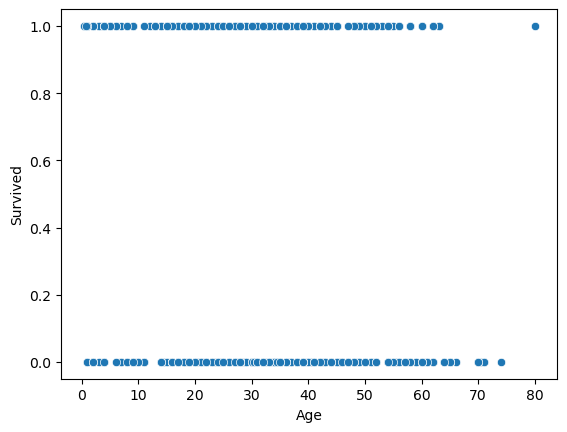

In [40]:
#taking two variables AGE and Survived 

sns.scatterplot(x='Age',y='Survived',data=data)

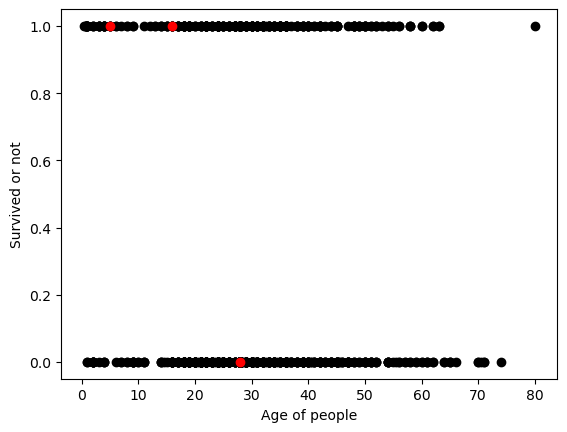

In [41]:
#1. choose k values or number of clusters k=3
#2.select random centroids

X=data
K=3
centroids=(X.sample(n=K))
plt.scatter(X['AAge'],X['Survived'],c='black')
plt.scatter(centroids['Age'],centroids['Survived'],c='red')
plt.xlabel('Age of people')
plt.ylabel('Survived or not')
plt.show()

In [42]:
from sklearn.cluster import KMeans
K=3
kmeans=KMeans(n_clusters=K,random_state=0)
X["Cluster"]=kmeans.fit_predict(X[["Age","Survived"]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


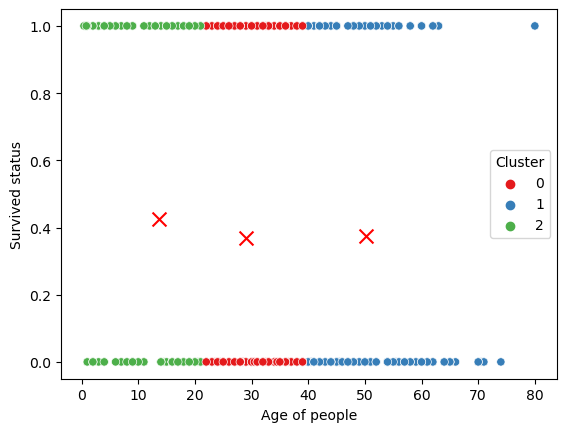

In [43]:
#Get Cluster methods
centroids=kmeans.cluster_centers_

sns.scatterplot(data=X,x="Age",y="Survived",hue="Cluster",palette="Set1")
plt.scatter(centroids[:, 0],centroids[:, 1],c='red',marker='x',s=100)
plt.xlabel('Age of people')
plt.ylabel('Survived status')
plt.show()

In [44]:
inertia=kmeans.inertia_
print("Inertia",inertia)


Inertia 30117.51352677915


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

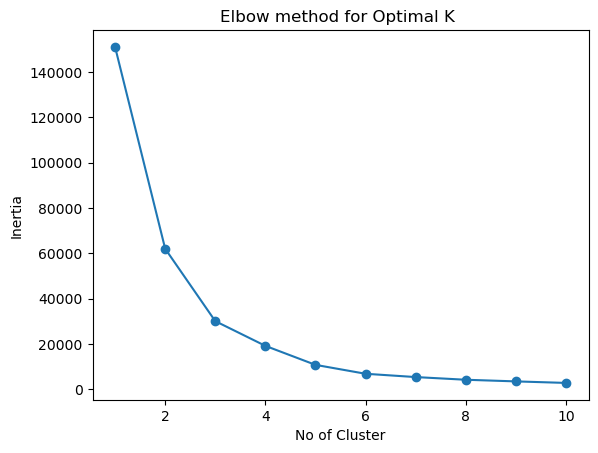

In [46]:
K_range=range(1,11)
inertia_values=[]

for K in K_range:
  kmeans=KMeans(n_clusters=K,random_state=0)
  kmeans.fit(X[["Age","Survived"]])
  inertia=kmeans.inertia_
  inertia_values.append(inertia)

plt.plot(K_range,inertia_values,marker='o')
plt.title("Elbow method for Optimal K ")
plt.xlabel('No of Cluster')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#After elbow method for optimal K here k is showing as 2